
# Часть 2

Работу выполнила Иванова Анастасия. Распределения Лапласа и косое нормальное
*  Косое нормальное распределение с параметром по умолчанию skew_alpha = 1

*  Распределение Лапласа с параметрами по умолчанию laplace_alpha = 0, laplace_beta = $\sqrt{\frac{1}{2}}$


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import precision_score as precision, recall_score as recall, accuracy_score as accuracy
from sklearn.model_selection import StratifiedKFold
import os

from graph import *
from graph_characteristic import *
from graph_simulate_statistics import *

In [ ]:
df_25 = generate_dataset(gen_laplace_points, gen_skewnormal_points, dataset_size=10000, num_vertex=25)
df_25.to_csv('25_vert_Ivanova.csv', index=False)
df_25.head()

100%|██████████| 5000/5000 [00:31<00:00, 158.69it/s]


,min_deg,max_deg,number_component,number_articul,numbertriangle,clique_number,max_independent_set,distribution
0,9,22,1,0,983,15,2,1
1,5,19,1,0,542,12,4,1
2,3,20,1,0,782,13,4,0
3,5,19,1,0,674,13,4,0
4,1,22,1,1,1469,19,3,1


In [ ]:
df_100 = generate_dataset(gen_laplace_points, gen_skewnormal_points, dataset_size=10000, num_vertex=100)
df_100.to_csv('100_vert_Ivanova.csv', index=False)
df_100.head()

100%|██████████| 5000/5000 [08:08<00:00, 10.23it/s]


,min_deg,max_deg,number_component,number_articul,numbertriangle,clique_number,max_independent_set,distribution
0,10,84,1,0,60357,51,4,1
1,5,81,1,0,65371,61,4,1
2,1,76,2,2,54277,54,6,0
3,6,79,1,0,50884,49,4,1
4,14,80,1,0,48241,46,4,1


In [ ]:
df_500 = generate_dataset(gen_laplace_points, gen_skewnormal_points, dataset_size=1000, num_vertex=500)
df_500.to_csv('500_vert_Ivanova.csv', index=False)
df_500.head()

100%|██████████| 500/500 [38:52<00:00,  4.67s/it]


,min_deg,max_deg,number_component,number_articul,numbertriangle,clique_number,max_independent_set,distribution
0,33,378,1,0,6435143,234,5,1
1,0,390,3,1,7357792,265,10,0
2,0,357,3,0,5645609,235,9,0
3,9,401,1,0,7105361,229,6,1
4,1,373,1,2,6486867,247,8,0


In [ ]:
for n, df in zip([25, 100, 500], [df_25, df_100, df_500]):
    X, y = df.drop('distribution', axis = 1), df['distribution']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=239, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(max_iter=1000, class_weight='balanced')
    model.fit(X_train_scaled, y_train)
    y_pred_logistic = model.predict(X_test_scaled)


    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred_linear = (model.predict(X_test_scaled) > 0.5).astype(int)


    model = Ridge()
    model.fit(X_train_scaled, y_train)
    y_pred_ridge = (model.predict(X_test_scaled) > 0.5).astype(int)

    model = Lasso()
    model.fit(X_train_scaled, y_train)
    y_pred_lasso = (model.predict(X_test_scaled) > 0.5).astype(int)

    print(f"N = {n}")
    print('\tLogistic')
    print("\t\tPrecision:", precision(y_test, y_pred_logistic))
    print("\t\tAccuracy:", accuracy(y_test, y_pred_logistic))
    print("\t\tRecall:", recall(y_test, y_pred_logistic), "\n")

    print('\tLinear')
    print("\t\tPrecision:", precision(y_test, y_pred_linear))
    print("\t\tAccuracy:", accuracy(y_test, y_pred_linear))
    print("\t\trecall:", recall(y_test, y_pred_linear), "\n")

    print('\tRidge')
    print("\t\tPrecision:", precision(y_test, y_pred_ridge))
    print("\t\tAccuracy:", accuracy(y_test, y_pred_ridge))
    print("\t\trecall:", recall(y_test, y_pred_ridge), "\n")



N = 25
	Logistic
		Precision: 0.730246913580247
		Accuracy: 0.7486666666666667
		Recall: 0.7886666666666666 

	Linear
		Precision: 0.7340359578425294
		Accuracy: 0.7516666666666667
		recall: 0.7893333333333333 

	Ridge
		Precision: 0.7340359578425294
		Accuracy: 0.7516666666666667
		recall: 0.7893333333333333 

N = 100
	Logistic
		Precision: 0.916005291005291
		Accuracy: 0.9193333333333333
		Recall: 0.9233333333333333 

	Linear
		Precision: 0.9057456423499032
		Accuracy: 0.919
		recall: 0.9353333333333333 

	Ridge
		Precision: 0.9057456423499032
		Accuracy: 0.919
		recall: 0.9353333333333333 

N = 500
	Logistic
		Precision: 1.0
		Accuracy: 1.0
		Recall: 1.0 

	Linear
		Precision: 1.0
		Accuracy: 1.0
		recall: 1.0 

	Ridge
		Precision: 1.0
		Accuracy: 1.0
		recall: 1.0 



## Вывод
Чем больше количество вершин в графе, тем проще различать распределения, результаты довольно хорошие, особенно на 500 вершинах, видимо характеристики сильно отличаются, поэтому легко отделить распределения

# Оценка дисперсии метрик

Выберем в качестве модели логистическую регрессию и проведем на ней кросс-валидацию

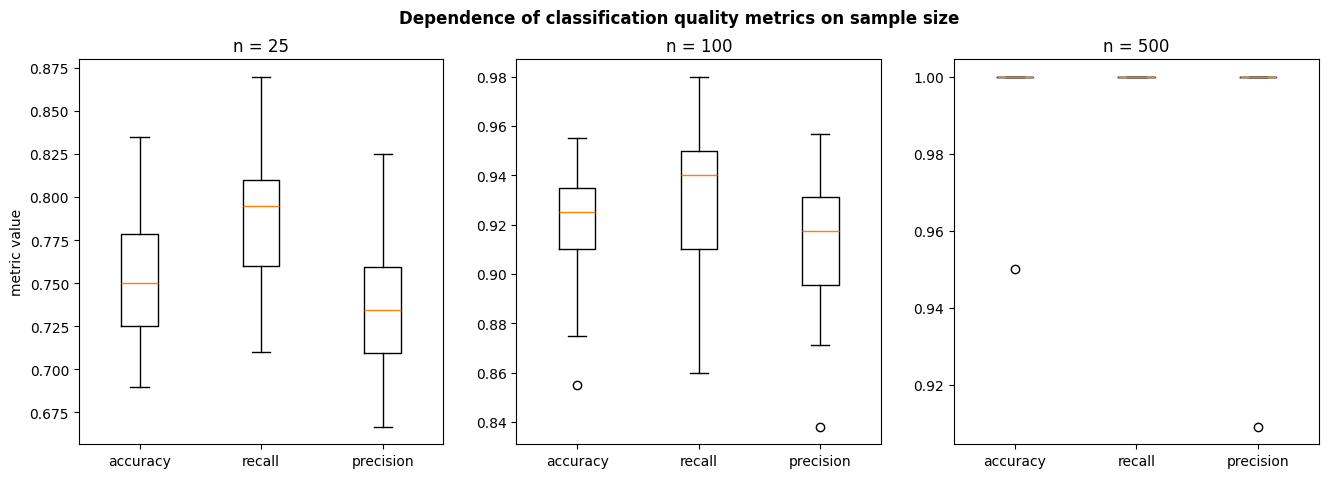

N = 25
	Accuracy dispersion =  0.0010282100000000014
	Recall dispersion =  0.00136596
	Precision dispersion =  0.0013037990923140028
N = 100
	Accuracy dispersion =  0.0004110399999999996
	Recall dispersion =  0.0009065599999999987
	Precision dispersion =  0.0005937863328676858
N = 500
	Accuracy dispersion =  4.900000000000008e-05
	Recall dispersion =  0.0
	Precision dispersion =  0.0001619834710743802


In [ ]:
plt.figure(figsize=(16,5))
plt.suptitle("Dependence of classification quality metrics on sample size", fontweight='bold')

dispersions = []

for idx, n, df in zip([0, 1, 2], [25, 100, 500], [df_25, df_100, df_500]):
    X, y = df.drop('distribution', axis = 1), df['distribution']

    cv = StratifiedKFold(n_splits=50, shuffle=True, random_state=52)
    metrics = [[], [], []]

    for train_idx, valid_idx in cv.split(X, y):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)

        model = LogisticRegression(max_iter=1000, class_weight='balanced')
        model.fit(X_train_scaled, y_train)
        prediction = model.predict(X_valid_scaled)
        metrics[0].append(accuracy(y_valid, prediction))
        metrics[1].append(recall(y_valid, prediction))
        metrics[2].append(precision(y_valid, prediction))

    dispersions.append([np.var(metrics[0]), np.var(metrics[1]), np.var(metrics[2])])

    plt.subplot(1, 3, idx + 1)
    plt.title(f"n = {n}")
    plt.boxplot(metrics, tick_labels=['accuracy', 'recall', 'precision'])
    if idx == 0:
        plt.ylabel("metric value")

plt.show()

for n, vars in zip([25, 100, 500], dispersions):
    print(f"N = {n}")
    print("\tAccuracy dispersion = ", vars[0])
    print("\tRecall dispersion = ", vars[1])
    print("\tPrecision dispersion = ", vars[2])

<h2>Вывод</h2>
Видим, что чем больше кол-во вершин, тем меньше дисперсия метрик

<h3>Выясним какие характеристики классификатор посчитал самыми важными</h3>

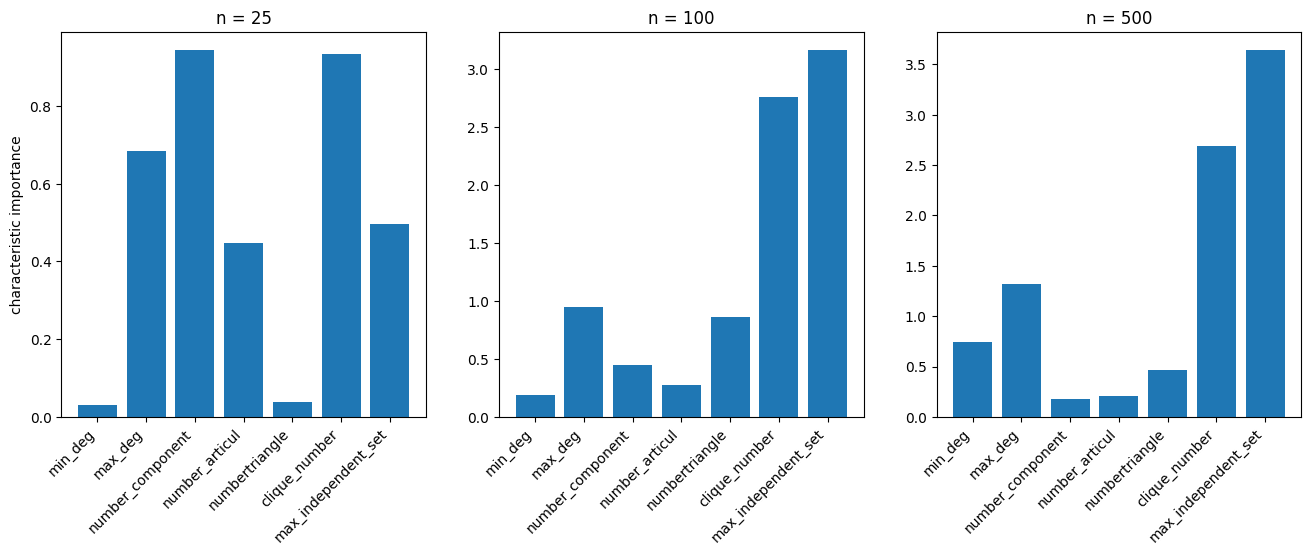

In [ ]:
plt.figure(figsize=(16,5))

features = df_25.drop(['distribution'], axis = 1).columns

for idx, n, df in zip([0, 1, 2], [25, 100, 500], [df_25, df_100, df_500]):

    X, y = df.drop('distribution', axis = 1), df['distribution']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=239, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    plt.subplot(1, 3, idx + 1)
    plt.title(f"n = {n}")
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)
    plt.bar(features, np.abs(model.coef_[0]))
    plt.xticks(rotation=45, ha='right')
    if idx == 0:
        plt.ylabel("characteristic importance")

plt.show()

<h2>Вывод</h2>

Получилось довольно интересно, что при разном количестве вершин модель дала разные веса характеристикам. Например для 25 вершин кол-во компонент связности одна из самых важных характеристик, а для 500 вершин уже не  играет роли.

Таким образом мы видим, что графы сильно меняются при изменении количества вершин, и единственный признак, который играет роль во всех случаях - кликовое число